In [166]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
session = WolframLanguageSession()
#session.evaluate(wl.MinMax([1, -3, 0, 9, 5]))
#sample = session.evaluate( wl.RandomVariate(wl.NormalDistribution(0,1), 1e6))
#print(sample)
#session.evaluate(wlexpr('ListPointPlot3D[pts]'))

# get all points inside the building, get all points inside a plane. 

((1, 1.5, 10), (1, 3.0, 9), (1, 4.5, 8), (1, 6.0, 7), (1, 7.5, 6), (1, 9.0, 5), (2, 1.5, 9), (2, 3.0, 8), (2, 4.5, 7), (2, 6.0, 6), (2, 7.5, 5), (2, 9.0, 4), (3, 1.5, 8), (3, 3.0, 7), (3, 4.5, 6), (3, 6.0, 5), (3, 7.5, 4), (3, 9.0, 3), (4, 1.5, 7), (4, 3.0, 6), (4, 4.5, 5), (4, 6.0, 4), (4, 7.5, 3), (4, 9.0, 2), (5, 1.5, 6), (5, 3.0, 5), (5, 4.5, 4), (5, 6.0, 3), (5, 7.5, 2), (5, 9.0, 1), (6, 1.5, 5), (6, 3.0, 4), (6, 4.5, 3), (6, 6.0, 2), (6, 7.5, 1), (7, 1.5, 4), (7, 3.0, 3), (7, 4.5, 2), (7, 6.0, 1), (8, 1.5, 3), (8, 3.0, 2), (8, 4.5, 1), (9, 1.5, 2), (9, 3.0, 1), (10, 1.5, 1)) 45


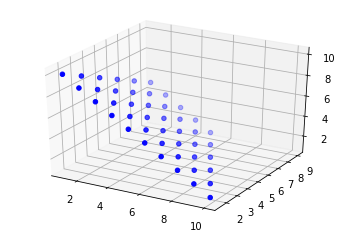

In [167]:
#print([pts[i][0]for i in range(len(pts))])
#pts=session.evaluate(wlexpr('First@Last@Reap@Do[If[x>=3y+2z &&x<=3y+2z, Sow@{x, y, z}], {x, 0,50,0.5}, {y, 0,50,0.5}, {z, 0,50,0.5}]'))
#pts=session.evaluate(wlexpr('First@Last@Reap@Do[If[(0)*x +(1)*y+(0)*z+(-6)<=0 && (0)*x +(1)*y+(0)*z+(-6)>=0, Sow@{x, y, z}], {x, 1 , 10 },{y, 6 , 6,0.5 },{z, 1.1 , 2 }]'))
pts=session.evaluate(wlexpr('First@Last@Reap@Do[If[x/2 +(1)*y/3+z/2+(-6)<=0 && x/2 +(1)*y/3+z/2+(-6)>=0, Sow@{x, y, z}], {x, 1 , 10 },{y, 1 , 10,0.5 },{z, 1 , 20 }]'))

fig = plt.figure()
print(pts,len(pts))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([pts[i][0]for i in range(len(pts))],[pts[i][1]for i in range(len(pts))],[pts[i][2]for i in range(len(pts))],c='b',marker='o')

# one plane how to get a plane parallize with it with distance d. Here we know the nomarl vector of that, and also one vector. 

[array([1, 6, 8]), array([3, 6, 8]), array([3, 6, 2]), array([1, 6, 2])] [1 6 8]
{x, 1 , 3 },{y, 6 , 6 },{z, 2 , 8 }]
21   First@Last@Reap@Do[If[(0)*x +(1)*y+(0)*z+(-6)<=0 && (0)*x +(1)*y+(0)*z+(-6)>=0, Sow@{x, y, z}],{x, 1 , 3 },{y, 6 , 6 },{z, 2 , 8 }]
((1, 6, 2), (1, 6, 3), (1, 6, 4), (1, 6, 5), (1, 6, 6), (1, 6, 7), (1, 6, 8), (2, 6, 2), (2, 6, 3), (2, 6, 4), (2, 6, 5), (2, 6, 6), (2, 6, 7), (2, 6, 8), (3, 6, 2), (3, 6, 3), (3, 6, 4), (3, 6, 5), (3, 6, 6), (3, 6, 7), (3, 6, 8))


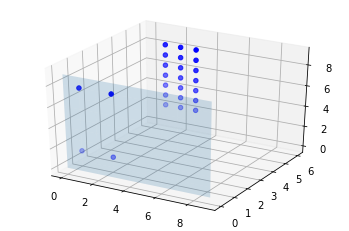

In [168]:
# given fours points for the range, how to get the plane function, whose distance with it is d.
import numpy as np 
x_c=np.array([5,5,5]);x=np.array([[1,0,8],[3,0,8],[3,0,2],[1,0,2]]); 
v_c=np.array([0,-1,0]);v_i=np.array([0,1,0]) # 
x=np.array([[1,0,8],[3,0,8],[3,0,2],[1,0,2]]); v_c=np.array([0,1,0]); d=6 
x_v=x[0]+v_c*d
x_new=[]
for i in range(len(x)):
    x_new.append(x[i]+v_c*d)
print(x_new,x_v)
plt3d = plt.figure().gca(projection='3d')
plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))],c='b',marker='o')
xx, zz = np.meshgrid(range(10), range(10));
yy=np.zeros([10,10])
plt3d.plot_surface(xx, yy, zz, alpha=0.2)
a,b,c=v_i
d=-(np.dot(v_i,x_v))
x_max=max(x_new[i][0]for i in range(len(x)));
y_max=max(x_new[i][1]for i in range(len(x)));
z_max=max(x_new[i][2]for i in range(len(x)));
x_min=min(x_new[i][0]for i in range(len(x)));
y_min=min(x_new[i][1]for i in range(len(x)));
z_min=min(x_new[i][2]for i in range(len(x)));
plane=(a,b,c,d)
scale=[]
scale.append("(%s)*x +(%s)*y+(%s)*z+(%s)<=0" % plane)
scale.append("(%s)*x +(%s)*y+(%s)*z+(%s)>=0" % plane)
s=scale[0] 
s=''.join([s,' && ',scale[1]])   
rg=''.join(['{x, ',str(x_min),' , ',str(x_max),' }'])
rg=''.join([rg, ',{y, ',str(y_min),' , ',str(y_max),' }'])
rg=''.join([rg, ',{z, ',str(z_min),' , ',str(z_max),' }]'])
print(rg)
#pts=session.evaluate(wlexpr('First@Last@Reap@Do[If['+s+', Sow@{x, y, z}],'+rg' {x, 0,50,0.5}, {y, 0,50,0.5}, {z, 0,50,0.5}]'))
pts=session.evaluate(wlexpr('First@Last@Reap@Do[If['+s+', Sow@{x, y, z}],'+rg))
print(str(len(pts))+'   First@Last@Reap@Do[If['+s+', Sow@{x, y, z}],'+rg)
print(pts)
plt3d.scatter([pts[i][0]for i in range(len(pts))],[pts[i][1]for i in range(len(pts))],[pts[i][2]for i in range(len(pts))],c='b',marker='o')

# plot a slope 

[-1  1  1]


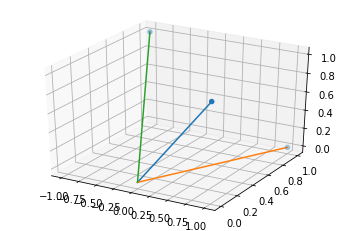

In [169]:
a=np.array([1,0,1]);b=np.array([1,1,0])
c=np.cross(a,b)
k=[]
#c=np.array([-1,1,1])
print(c)
#print(np.dot(a,b))
k=[a,b,c]
k
plt3d = plt.figure().gca(projection='3d')
k[0][1]
plt3d.scatter([k[i][0]for i in range(len(k))],[k[i][1]for i in range(len(k))],[k[i][2]for i in range(len(k))])
k.append([0,0,0])
for i in range(3):
    plt3d.plot([0,k[i][0]],[0,k[i][1]],[0,k[i][2]])

# here I want to get the boundries of the FoV 

0.7853981633974483 0.7853981633974483


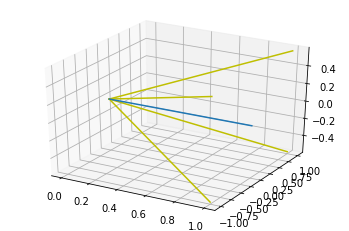

In [170]:
import math
import numpy as np
ax = plt.figure().gca(projection='3d')
a=45;b=30;
b=math.radians(b); a=math.radians(a)
a_x=[1,1,-1,-1];a_y=[1,-1,1,-1]
ray=[]
for i in range(4):
    ray.append([1,a_x[i]*np.tan(a),a_y[i]*np.tan(b)])
    ax.plot([0,1],[0,a_x[i]*np.tan(a)],[0,a_y[i]*np.tan(b)],'y')
# ax.scatter( [0,1,1,1], [0,np.tan(a),0,np.tan(a)], [0,0,np.tan(b),np.tan(b)] )
# ax.plot([0,1],[0,np.tan(a)],[0,0])
# ax.plot([0,1],[0,0],[0,np.tan(b)])
# ax.plot([0,1],[0,np.tan(a)],[0,np.tan(b)])
ax.plot([0,1],[0,0],[0,0])
print(a,np.pi/4)

# When orintation is changed from (1,0,0) to v_i, how did it rotated? 

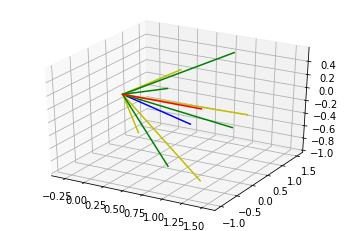

In [171]:
th_x=math.radians(30);th_y=math.radians(30);th_z=math.radians(45)
R_x=np.array([[1, 0, 0],[0, np.cos(th_x),-np.sin(th_x)],[0,np.sin(th_x),np.cos(th_x)]])
R_y=np.array([[np.cos(th_y), 0, np.sin(th_y)],[0, 1,0],[-np.sin(th_y),0,np.cos(th_y)]])
R_z=np.array([[np.cos(th_z), -np.sin(th_z),0],[np.sin(th_z),np.cos(th_z),0],[0, 0,1]])
r=[]
un=np.array([[1],[0],[0]])
#v1=np.array([[1],[tan(a)],[tan(b)]])
r.append([0,0,0])
r.append((np.matmul(R_x,un)))
r.append((np.matmul(R_y,un)))
r.append((np.matmul(R_z,un)))
from numpy.linalg import inv
tmp=np.matmul(R_z,R_y)
#print(inv(un))
r.append((np.matmul(tmp,un)))
for i in range(4):
    r.append((np.matmul(tmp,np.array([ray[i]]).T)))
ax = plt.figure().gca(projection='3d')

#ax.scatter([r[i][0] for i in range(1,len(r))],[r[i][1] for i in range(1,len(r))],[r[i][2] for i in range(1,len(r))],c='b',marker='o')
#ax.plot([0,r[1][0]],[0,r[1][1]],[0,r[1][2]],'b' ) # roll 
#ax.plot([0,r[2][0]],[0,r[2][1]],[0,r[2][2]],'g')  # y axies pitch 
#ax.plot([0,r[3][0]],[0,r[3][1]],[0,r[3][2]],'r')  # raw z axies 
ax.plot([0,r[4][0]],[0,r[4][1]],[0,r[4][2]],'b')  # raw z axies 
for i in range(4):
    ax.plot([0,r[5+i][0]],[0,r[5+i][1]],[0,r[5+i][2]],'y')
    ray.append([1,a_x[i]*np.tan(a),a_y[i]*np.tan(b)])
    ax.plot([0,1],[0,a_x[i]*np.tan(a)],[0,a_y[i]*np.tan(b)],'g')
# ax.scatter( [0,1,1,1], [0,np.tan(a),0,np.tan(a)], [0,0,np.tan(b),np.tan(b)] )
#ax.plot([0,1],[0,np.tan(a)],[0,0])
#ax.plot([0,1],[0,0],[0,np.tan(b)])
#ax.plot([0,1],[0,np.tan(a)],[0,np.tan(b)])
ax.plot([0,1],[0,0],[0,0],'r')



In [172]:
tmp=np.matmul(R_z,R_y)
print(tmp)
print(np.dot(R_z,R_y))
#print(np.matmul(tmp,un))
print(R_z*R_y)
np.array([ray[0]]).T
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6
 
 
# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :
 
    assert(isRotationMatrix(R))
     
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
     
    singular = sy < 1e-6
 
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
 
    return np.array([x, y, z])
ans=rotationMatrixToEulerAngles(tmp)
print(ans[0],180/(np.pi/ans[1]),180/(np.pi/ans[2]))

[[ 0.61237244 -0.70710678  0.35355339]
 [ 0.61237244  0.70710678  0.35355339]
 [-0.5         0.          0.8660254 ]]
[[ 0.61237244 -0.70710678  0.35355339]
 [ 0.61237244  0.70710678  0.35355339]
 [-0.5         0.          0.8660254 ]]
[[ 0.61237244 -0.          0.        ]
 [ 0.          0.70710678  0.        ]
 [-0.          0.          0.8660254 ]]
0.0 30.0 44.99999999999999


# Suppose the location of the camera is x_c,the camera orientation is v_c, vertices of a window are x_1,x_2,x_3,x_5, the normal vector of the window is v_i. 

In [173]:
[[x[i][0]for i in range(len(x))].append(x_n[0])]

NameError: name 'x_n' is not defined

In [174]:
import numpy as np 
x_c=np.array([5,5,5]);x=np.array([[1,0,8],[3,0,8],[3,0,2],[1,0,2]]); 
v_c=np.array([0,-1,0]);v_i=np.array([0,1,0]) # 

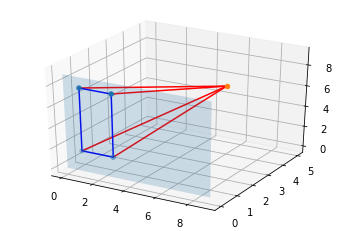

In [175]:
xx, zz = np.meshgrid(range(10), range(10));
yy=np.zeros([10,10])
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.2)
plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
plt3d.scatter(x_c[0],x_c[1],x_c[2])
for i in range(4):
    plt3d.plot([x_c[0],x[i][0]],[x_c[1],x[i][1]],[x_c[2],x[i][2]],'r')
a=[0,1,2,3,0]
plt3d.plot([x[i][0]for i in a],[x[i][1]for i in a],[x[i][2]for i in a],'b')



# Calculate the distance from camera to window and the angle distortion 

38.32881810145588
here 2.5495097567963922
here 2.5495097567963922
[5.  4.5 2.5]
distance =  2.5495097567963922 2.5495097567963922 -0.5
intersection =  38.32881810145588


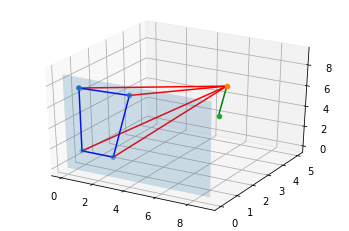

In [176]:
#distance=
import math
x_c=np.array([5,5,5]);
#v_c=np.array([0,-1,0]);v_i=np.array([0,3,0]) # 
x=np.array([[1,0,8],[3,1,7],[3,0,2],[1,0,2]]);
v_c=np.array([0,1,5]);v_i=np.array([1,2,2])
ndotu=np.dot(v_i,v_c)
len1=math.sqrt( (v_c[0])**2 + (v_c[1])**2+(v_c[2])**2 )
len2=math.sqrt( (v_i[0])**2 + (v_i[1])**2+(v_i[2])**2 )
ang = math.degrees(math.acos(ndotu/(len1*len2)))
print(ang)
if ndotu==0:
    ndotu=1
w=x_c-x[1]
si=np.dot(-(v_i),w)/ndotu
print("here",abs((np.dot(-(v_i),w)/(np.dot(v_i,v_c)))*math.sqrt(v_c[0]**2+v_c[1]**2+v_c[2]**2)))
print("here",abs((np.dot(-(v_i),w)/ndotu)*math.sqrt(v_c[0]**2+v_c[1]**2+v_c[2]**2)))
Psi=x_c+(si*v_c)
print(Psi)
distance= math.sqrt( (Psi[0] - x_c[0])**2 + (Psi[1] - x_c[1])**2+(Psi[2] - x_c[2])**2 )
distance2=abs(si*math.sqrt(v_c[0]**2+v_c[1]**2+v_c[2]**2))
print("distance = ", distance,distance2,si)
print("intersection = ",ang)
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.2)
plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
plt3d.scatter(x_c[0],x_c[1],x_c[2])
for i in range(4):
    plt3d.plot([x_c[0],x[i][0]],[x_c[1],x[i][1]],[x_c[2],x[i][2]],'r')
a=[0,1,2,3,0]
plt3d.plot([x[i][0]for i in a],[x[i][1]for i in a],[x[i][2]for i in a],'b')
plt3d.plot([Psi[0], x_c[0]],[Psi[1], x_c[1]],[Psi[2], x_c[2]],'g')
plt3d.scatter(Psi[0],Psi[1],Psi[2])
# w = rayPoint - planePoint
# 	si = -planeNormal.dot(w) / ndotu
# 	Psi = w + si * rayDirection + planePoint
# 	return Psi

# Judge if the object is within the field of view through the FOV angle \theta 1 and \theta2 

In [177]:
theta_1=30
theta_2=30 
math.cos(theta_1)

#K=np.array[[1]]

0.15425144988758405

# Judge if there are obstacles

In [178]:
plane=[];
# the cross product is a vector normal to the plane
for i in range(4):
    if i==3:
        cp=np.cross((x[i]-x_c),(x[0]-x_c))
        rest=list(set(range(4))-set([i,0]))[0]
    else:
        cp=np.cross((x[i]-x_c),(x[i+1]-x_c))
        rest=list(set(range(4))-set([i,i+1]))[0]
    print(rest)
    a,b,c=cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d=-(np.dot(cp,x_c))
    k=a*x[rest][0]+b*x[rest][1]+c*x[rest][2]+d
    if k>0:
        e='>='
    else:
        e='<='
    plane.append((a,b,c,d,e))
d=-(np.dot(v_i,x[0]))
#print(d)
k=v_i[0]*x_c[0]+x_c[1]*v_i[1]+v_i[2]*x_c[2]+d
if k > 0:
    e='>='
else:
    e='<='
plane.append((v_i[0],v_i[1],v_i[2],d,e))
print(plane)
scale=[]
for i in range(5):
    scale.append("(%s)*x +(%s)*y+(%s)*z+(%s)%s0" % plane[i])
s=scale[0]
for i in range(4):
    s=''.join([s,' && ',scale[i+1]])    

2
0
0
1
[(2, 2, 6, -50, '<='), (22, -10, 2, -70, '<='), (0, 6, -10, 20, '<='), (-30, 24, 0, 30, '<='), (1, 2, 2, -17, '>=')]


[1, 2, 3, 3, 3, 3, 4, 4, 4, 5]


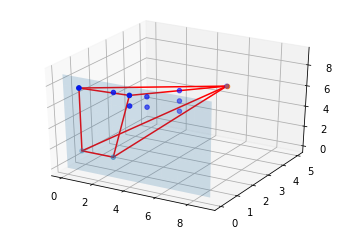

In [179]:
pts=session.evaluate(wlexpr('First@Last@Reap@Do[If['+s+', Sow@{x, y, z}], {x, 0,50}, {y, 0, 55}, {z, 0, 50}]'))
print([pts[i][0]for i in range(len(pts))])
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter([pts[i][0]for i in range(len(pts))],[pts[i][1]for i in range(len(pts))],[pts[i][2]for i in range(len(pts))],c='b',marker='o')

plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.2)
plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
plt3d.scatter(x_c[0],x_c[1],x_c[2])
for i in range(4):
    plt3d.plot([x_c[0],x[i][0]],[x_c[1],x[i][1]],[x_c[2],x[i][2]],'r')
a=[0,1,2,3,0]
plt3d.plot([x[i][0]for i in a],[x[i][1]for i in a],[x[i][2]for i in a],'r')
plt3d.scatter([pts[i][0]for i in range(len(pts))],[pts[i][1]for i in range(len(pts))],[pts[i][2]for i in range(len(pts))],c='b',marker='o')



In [180]:
c_1=np.array([[1],[2],[3]])
c_2=np.array([[2],[2],[1]])
c_3=np.array([1,2,3])
c_4=np.array([2,2,1])
#np.dot(c_2,c_3)
#np.dot(c_3,c_4)
# c_3*c_1
# c_1*c_3
#c_3*c_1
np.matmul(c_3,c_4)
#c_3
#c_4

9

[(11, 15, -2), (12, 15, -2), (13, 15, -2), (14, 16, -2), (15, 16, -2)]


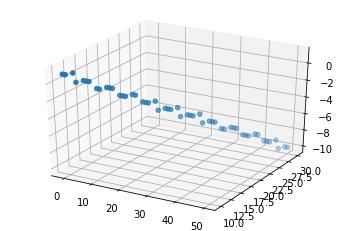

In [181]:
# Python3 code for generating points on a 3-D line 
# using Bresenham's Algorithm 

def Bresenham3D(x1, y1, z1, x2, y2, z2): 
	ListOfPoints = [] 
	ListOfPoints.append((x1, y1, z1)) 
	dx = abs(x2 - x1) 
	dy = abs(y2 - y1) 
	dz = abs(z2 - z1) 
	if (x2 > x1): 
		xs = 1
	else: 
		xs = -1
	if (y2 > y1): 
		ys = 1
	else: 
		ys = -1
	if (z2 > z1): 
		zs = 1
	else: 
		zs = -1

	# Driving axis is X-axis" 
	if (dx >= dy and dx >= dz):		 
		p1 = 2 * dy - dx 
		p2 = 2 * dz - dx 
		while (x1 != x2): 
			x1 += xs 
			if (p1 >= 0): 
				y1 += ys 
				p1 -= 2 * dx 
			if (p2 >= 0): 
				z1 += zs 
				p2 -= 2 * dx 
			p1 += 2 * dy 
			p2 += 2 * dz 
			ListOfPoints.append((x1, y1, z1)) 

	# Driving axis is Y-axis" 
	elif (dy >= dx and dy >= dz):	 
		p1 = 2 * dx - dy 
		p2 = 2 * dz - dy 
		while (y1 != y2): 
			y1 += ys 
			if (p1 >= 0): 
				x1 += xs 
				p1 -= 2 * dy 
			if (p2 >= 0): 
				z1 += zs 
				p2 -= 2 * dy 
			p1 += 2 * dx 
			p2 += 2 * dz 
			ListOfPoints.append((x1, y1, z1)) 

	# Driving axis is Z-axis" 
	else:		 
		p1 = 2 * dy - dz 
		p2 = 2 * dx - dz 
		while (z1 != z2): 
			z1 += zs 
			if (p1 >= 0): 
				y1 += ys 
				p1 -= 2 * dz 
			if (p2 >= 0): 
				x1 += xs 
				p2 -= 2 * dz 
			p1 += 2 * dy 
			p2 += 2 * dx 
			ListOfPoints.append((x1, y1, z1)) 
	return ListOfPoints 


def main(): 
    (x1, y1, z1) = (-1, 10, 1) 
    (x2, y2, z2) = (50, 30, -10) 
    x = Bresenham3D(x1, y1, z1, x2, y2, z2) 
    #print(ListOfPoints) 
    plt3d = plt.figure().gca(projection='3d')
    #plt3d.plot_surface(xx, yy, zz, alpha=0.2)
    plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
    print([i for i in x if i[2]==-2])
main() 


# here I need to decide if I want to consider about the obstruction. I think I will not consider about that, because I think if that, that will be too complicated! Too much math. If there is no obstacble... = =   it is normal in indoor scene, but it is a little trivial in outdoor aerial monitoring! I think

# Here I want to decide if a point is within the fov, a polygen in the plane. What should I do is to project the 3-d to 2-d, then to judge if it contains in a convex. 

In [182]:
#### from matplotlib import path
x=[(0,0), (0, 20), (10, 10),(2,3)];
print(x[0][1])
y=[(0,0),(4,5),(3,5),(4,6),(7,10),(10,10),(12,1)];
p = path.Path(x)  # square with legs length 1 and bottom left corner at the origin
print(p.contains_points(y))
p = path.Path([(0,0), (0, 2), (1, 1), (1, 0)])  # square with legs length 1 and bottom left corner at the origin
p.contains_points([(.5, .5),(0,0),(0.2,0.2)])
x.append((0,0))
plt.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))])
#hold()
plt.plot([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))])
plt.scatter([y[i][0]for i in range(len(y))],[y[i][1]for i in range(len(y))])
plt.show()

0


NameError: name 'path' is not defined

In [183]:
import pyny3d.geoms as pyny

# this method is okay, but it defaulty project it z axis, it is not okay,  if z is parallize to plane. So, I may choose the path.contains method. 

[[ -1   0   1]
 [ 10   0 100]
 [ 10  10   0]
 [  0  10   1]
 [  0  20  30]]


array([False,  True,  True,  True, False])

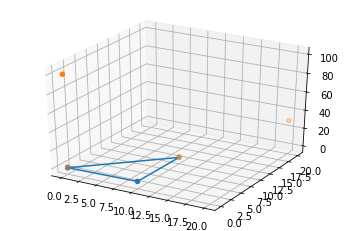

In [184]:
base = np.array([[0,0,0], [10,0,1], [10,10,0], [0,10,1]]) # Base square on the floor
x=[[0,0,0], [10,0,1], [10,10,0],[0,0,0]];
pillar = np.array([[4,4,8], [6,4,8], [6,6,8], [4,6,8]]) # Top obtacle polygon (to extrude)
## Obstacle
place = pyny.Polygon(base)
#place.add_extruded_obstacles(pillar)
#space = pyny.Space(place)
plt3d = plt.figure().gca(projection='3d')
l=np.array([[ -1,0,1], [10,0,100], [10,10,0], [0,10,1],[0,20,30]])  # here it is the z=0 projection 
print(l)
plt3d.scatter([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
plt3d.plot([x[i][0]for i in range(len(x))],[x[i][1]for i in range(len(x))],[x[i][2]for i in range(len(x))])
plt3d.scatter([l[i][1]for i in range(len(l))],[l[i][1]for i in range(len(l))],[l[i][2]for i in range(len(l))])
#plt3d.plot([l2[i][1]for i in range(len(l))],[l2[i][1]for i in range(len(l))],[l2[i][1]for i in range(len(l))])
place.contains(l)

In [185]:
from shapely.geometry import Polygon,Point,LineString
poly = Polygon(((0, 0), (0, 1), (1, 1), (1, 0)))
from shapely.geometry import MultiPoint
# coords is a list of (x, y) tuples
coords=np.array([[0,0], [10,0], [10,10], [0,10]]) 
poly = MultiPoint(coords).convex_hull        # wow!!! shapely only used for 2 plane !!! 

# use this path.contains method to decide the if the point inside the fov. pay attentation to counter-clock direction and raidus with 1e-8

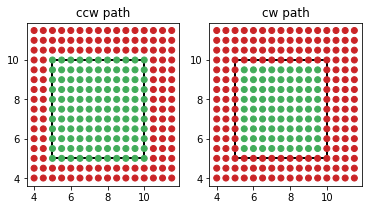

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path

a,b = 5,10
polygon = [(a,a),(b,a),(b,b),(a,b),(a,a)]

x,y = np.meshgrid(np.arange(a-1,b+2,0.5),np.arange(a-1,b+2,0.5))
points = list(zip(x.flatten(),y.flatten()))
#print((zip(x.flatten(),y.flatten())),list((x.flatten(),y.flatten())))
path = matplotlib.path.Path(polygon, closed=True)
inside = path.contains_points(points,radius=1e-8)    # counter-clock cover more! 

path2 = matplotlib.path.Path(polygon[::-1], closed=True)
inside2 = path2.contains_points(points,radius=1e-2)


fig,(ax,ax2)=plt.subplots(ncols=2, figsize=(6,3))
# plot ccw path
patch = plt.Polygon(polygon, zorder=0, fill=False, lw=2)
ax.add_patch(patch)
ax.scatter(x.flatten(),y.flatten(), c=inside.astype(float),cmap="RdYlGn", vmin=-.1,vmax=1.2)
# plot cw path
patch2 = plt.Polygon(polygon[::-1], zorder=0, fill=False, lw=2)
ax2.add_patch(patch2)
ax2.scatter(x.flatten(),y.flatten(), c=inside2.astype(float),cmap="RdYlGn", vmin=-.1,vmax=1.2)

ax.set_title("ccw path")
ax2.set_title("cw path")
plt.show()

# We need a statistic for calcaulating the fov of camera 

In [187]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math 
import matplotlib
drone=pd.read_csv('drone_char.csv',sep=' ')
print(drone)
def GetFov(d,drone,No):
    if (No>=len(drone.values)):
        print("There is no No")
    else:
        data=drone.loc[No,['ss_w','ss_h','fl','pixel_w','pixel_h']].values
        h=data[0];v=data[1];fl=data[2];ph=data[3];pv=data[4]
        #print(data)
        hfov=round(d*h/fl,2)
        hr=round(ph/hfov,2)
        haov=round(2*math.degrees(math.atan(h/(2*fl))),2)
        #print(haov)
        vfov=round(d*v/fl,2)
        vr=round(pv/vfov,2)
        vaov=round(2*math.degrees(math.atan(v/(2*fl))),2)
        #print(vaov)
        print("fov with width=" ,hfov, "; height=",vfov,"; HRS=",hr,"; VRS=",vr )
        return hfov,vfov,hr,vr
h,v,hr,vr=GetFov(20,drone,3)
print(h,v,hr,vr)

   ss_w  ss_h  pixel_w  pixel_h  fl         name  velocity  Unnamed: 7
0   6.3   4.7     2720     1530  24   Mavix_Mini       3.8         NaN
1  13.2   8.8     3840     2160  28  Mavic_2_Pro      10.0         NaN
2  23.5  15.7     6016     3200  36   Zenmuse_X7       3.8         NaN
3  23.5  15.7     6016     3200  24   Zenmuse_X7       3.8         NaN
fov with width= 19.58 ; height= 13.08 ; HRS= 307.25 ; VRS= 244.65
19.58 13.08 307.25 244.65


# Now, I need to get all windows. Given a location of drone, given a distance range 3~20. We can get some coverage candidates. （ here the corrdinates are not right yet!!!!!) Here I did not simplify that, right. Simplicification is a little complicated. Not that smart. 

In [977]:
import itertools
def get_wp(dis, win):
    h,v,hr,vr=GetFov(dis,drone,3)
    win_y=win.sort_values(by='v_2_y', ascending=False)
    h_c_dic=win.groupby(['v_2_y']).groups
    h_b_dic=win.groupby(['v_1_y']).groups
    w_l_dic=win.groupby(['v_1_x']).groups
    w_r_dic=win.groupby(['v_3_x']).groups
#travse from top to bottom 
    order=np.sort(list(h_c_dic.keys()))[::-1]
    covers=[]
    win_num=[[]for i in range(len(win))]    
    for i in range(len(order)):
        for j in list(h_c_dic.get(order[i])): 
            k=order[i]-v
            tmp=order[i]
            cover=[i for i in list(h_b_dic.keys())[::-1] if k<=i<tmp]
            num=1
            while len(cover)==0: 
                num=num+1
                k=k-v
                cover=[i for i in list(h_b_dic.keys())[::-1] if k<=i<tmp]
            #print("here use ",num, "for top and down waypoints",order[i],v, cover)
            win_num[j].append(num)
            cover_set=[]
            for z in range(len(cover)):
                cover_set=cover_set+list(h_b_dic.get(cover[z]))
            covers.append(cover_set)
    h_covers = list(covers for covers,_ in itertools.groupby(covers)) 
    order2=np.sort(list(w_l_dic.keys()))
    covers=[]
    for i in range(len(order2)):
        for j in list(w_l_dic.get(order2[i])): 
            k=order2[i]+h
            tmp=order2[i]
            cover=[i for i in list(w_r_dic.keys()) if tmp<i<=k]
            num=1
            while len(cover)==0: 
                num=num+1
                k=k+h
                cover=[i for i in list(w_r_dic.keys()) if tmp<i<=k]
            win_num[j].append(num)
            cover_set=[]
            for z in range(len(cover)):
                cover_set=cover_set+list(w_r_dic.get(cover[z]))
            covers.append(cover_set)
    w_covers = list(covers for covers,_ in itertools.groupby(covers))
    com=[]
    for i in (h_covers):
        for j in (w_covers):
            com.append((list(set(i)&set(j))))
    print(com,len(com))
    com = list(com for com,_ in itertools.groupby(com))
    print(com,len(com))
    #heuristic method for waypoint selection for total coverage 
    com.sort(key=len)
    com=com[::-1]
    #print(com)
    S=[];Co=[]
    i=0
    while len(Co)<len(win): 
        tmp=com[0]
        Co=set(itertools.chain(Co,tmp))
        S.append(tmp)
        com.remove(tmp)
        for i in range (len(com)): 
            com[i]=list(set(com[i])-set(tmp))
        com.sort(key=len)
        com=com[::-1]
    print("generate", len(S),"waypoints to cover all windows")
    win_count=[]
    for i in range(len(win_num)):
        win_count.append(win_num[i][0]*win_num[i][1])
    waypoint=[]
    axis=win.loc[win['id']==S[0][0]]['fix_aix'].values[0]
    angle=win.loc[win['id']==S[0][0]]['angle'].values[0]
    fix=win.loc[win['id']==S[0][0]]['fix_v'].values[0]  # all windows in one facades are same 
    waypoints=[]
    for i in S: 
        y_max=max(win.loc[win['id'].isin(i)]['v_2_y'].values)
        y_min=min(win.loc[win['id'].isin(i)]['v_1_y'].values)   
        x_max=max(win.loc[win['id'].isin(i)]['v_3_x'].values)
        x_min=max(win.loc[win['id'].isin(i)]['v_1_x'].values)    
        if str(axis)=='y':
            v_y=fix+dis
            position=[round((x_max+x_min)/2,2),v_y,round((y_max+y_min)/2,2)]
        else:
            v_x=fix+dis
            position=[v_x, round((x_max+x_min)/2,2),round((y_max+y_min)/2,2)]
        waypoints.append(position)
        
    return waypoints,win_count,S
get_wp(15, win)

fov with width= 14.69 ; height= 9.81 ; HRS= 409.53 ; VRS= 326.2
[[9, 10, 11, 21, 22, 23], [33, 34, 35, 21, 22, 23], [33, 34, 35, 45, 46, 47], [45, 46, 47, 57, 58, 59], [69, 70, 71, 57, 58, 59], [69, 70, 71, 81, 82, 83], [81, 82, 83, 93, 94, 95], [105, 106, 107, 93, 94, 95], [105, 106, 107], [8, 9, 10, 20, 21, 22], [32, 33, 34, 20, 21, 22], [32, 33, 34, 44, 45, 46], [44, 45, 46, 56, 57, 58], [68, 69, 70, 56, 57, 58], [68, 69, 70, 80, 81, 82], [80, 81, 82, 92, 93, 94], [104, 105, 106, 92, 93, 94], [104, 105, 106], [7, 8, 9, 19, 20, 21], [32, 33, 19, 20, 21, 31], [32, 33, 43, 44, 45, 31], [43, 44, 45, 55, 56, 57], [67, 68, 69, 55, 56, 57], [67, 68, 69, 79, 80, 81], [79, 80, 81, 91, 92, 93], [103, 104, 105, 91, 92, 93], [104, 105, 103], [6, 7, 8, 18, 19, 20], [32, 18, 19, 20, 30, 31], [32, 42, 43, 44, 30, 31], [42, 43, 44, 54, 55, 56], [66, 67, 68, 54, 55, 56], [66, 67, 68, 78, 79, 80], [78, 79, 80, 90, 91, 92], [102, 103, 104, 90, 91, 92], [104, 102, 103], [5, 6, 7, 17, 18, 19], [17, 18, 

([[61.52, 73.39, 5.0],
  [12.64, 73.39, 32.0],
  [46.16, 73.39, 5.0],
  [25.8, 73.39, 32.0],
  [32.57, 73.39, 5.0],
  [39.29, 73.39, 32.0],
  [19.26, 73.39, 5.0],
  [52.89, 73.39, 32.0],
  [61.52, 73.39, 14.0],
  [12.64, 73.39, 23.0],
  [46.16, 73.39, 14.0],
  [25.8, 73.39, 23.0],
  [32.57, 73.39, 14.0],
  [39.29, 73.39, 23.0],
  [19.26, 73.39, 14.0],
  [52.89, 73.39, 23.0],
  [6.16, 73.39, 14.0],
  [61.52, 73.39, 23.0],
  [6.16, 73.39, 5.0],
  [61.52, 73.39, 32.0]],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

In [986]:
a=[[2,3],[1,2],[2,3,4],[2,3]]
c=[[2,3,4],[1,2,4],[2,3,4],[2,3]]
for i in a: 
    for j in b: 
        co=
b=list(a for a,_ in itertools.groupby(a))
print(b)

[[2, 3], [1, 2], [2, 3, 4], [2, 3], 1]


# here to do the path planning method.

In [954]:
win=pd.read_csv('data/win_data_5.csv',sep=' ') 
win.insert(0,'id',win.index,True)   #here win added id! I may need to add it in advance 
#here we use 15 as example. 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math 
import random
import copy
#win=pd.read_csv('data/win_data_5.csv',sep=' ') 
global task_dic
task_dic={'df1':[3,0.3],'dh1':[3,0.1],'dw1':[3,0.1],'dw2':[2,0.01],'df2':[3,0.01],'dh2':[2,0.1],
          'mf':[5,0.5],'mh1':[4,0.5],'mh2':[4,0.3]}
tasks=task_dic.keys()
ins_m_dic={'30':{'df':0.8,'dh':0.6,'dw':0.5,'mf':0.3,'mh':0.3},'15':{'df':1,'dh':1,'dw':1,'mf':0.7,'mh':0.5},
           '10':{'df':1,'dh':1,'dw':1,'mf':1,'mh':1},'0':{'df':0,'dh':0,'dw':0,'mf':0,'mh':0}}  
global R_v # drone rate  
R_v=3
global To# loiter time 
To=3 
#I want to define the impacted area of a fire source.
#impacted area for fire f1: four sourrding windows within two next room and for upstairs and downstairs if it has that. 
#impacted area for fire and smoke f2: whole floor and up 2 floors. down 1 floor windows. 
#here how to yshrink waypoint candidates? here for the fine grained insepction I think, only for 
#print(ins_m_dic.get('c').get('df'))
#'name','[inital value, rate]'
#Here is the main function!!!! 
class M_a:
    #print(task_dic)
    def __init__(self,m_id=-1,task=[],ini_va=[],la_t=[]):
        self.id = m_id 
        self.task=task
        self.va=ini_va
        self.la_t=la_t
    def print_M(self):
        print(self.id)
        print(self.task)  
        print(self.va)     # here value is current value 
    def change(self,old=None ,new=None):
        print(self.task)
class Wap:
    def __init__(self,m_id=-1,loc=[],ty=-1,cover=[]):
        self.id=m_id
        self.loc=loc
        self.ty=ty
        self.cover=cover
m_set=[]    # monitoring set with task set, last time, current value,
task_com=[['df1','dh1','dw1'],['df2','dh1','dw2'],['df2','dh2'],['mf','mh1'],['mh2'],['df2'],['mf','dh1','dw1']]
random.seed(0)
task=[random.choice(task_com) for i in range(len(win))] 
for i in range(len(win)):  
    value=[]
    for j in task[i]:
        value.append(task_dic.get(j)[0])
    last_v=-100*np.ones(len(task[i]))
    a=M_a(i,task[i],value,last_v) # here assume the inital time is 0, and all initial value is the intial value of each task. 
    m_set.append(a) # Here we get all monitoring areas with tasks 
Wap_set=[]    # waypoint set 
wp,tp,co=Get_WapCa([10,15,30])
for i in range(len(wp)):
    wapp=Wap(i,wp[i],tp[i],co[i])
    Wap_set.append(wapp) 
Q=[3,5,1,7,9,4,10,2,1,4,5,2,6]#visiting sequence list, Here we rule the first one is the initial location, will not loiter. 
T=Get_TL(wp,Q)
res,m2=Calculate_inflos(m_set,T,0,60)
print(Value)

fov with width= 9.79 ; height= 6.54 ; HRS= 614.5 ; VRS= 489.3
generate 30 waypoints to cover all windows
fov with width= 14.69 ; height= 9.81 ; HRS= 409.53 ; VRS= 326.2
generate 20 waypoints to cover all windows
fov with width= 29.38 ; height= 19.62 ; HRS= 204.77 ; VRS= 163.1
generate 4 waypoints to cover all windows
[[ 0.   16.73  4.53 ... 12.42  7.53 10.8 ]
 [16.73  0.   13.38 ...  9.62 19.34 17.72]
 [ 4.53 13.38  0.   ... 10.65 10.17 12.78]
 ...
 [12.42  9.62 10.65 ...  0.   11.36  9.65]
 [ 7.53 19.34 10.17 ... 11.36  0.    6.  ]
 [10.8  17.72 12.78 ...  9.65  6.    0.  ]]
118920.82


In [971]:
def Get_D(wps,R_v):
    D=np.zeros((len(wps),len(wps)))
    for i in range(len(wps)):
        for j in range(i+1,len(wps)):
            squared_dist = np.sum((np.array(wps[i])-np.array(wps[j]))**2, axis=0)
            D[i][j]=math.ceil(np.sqrt(squared_dist)/R_v)
            #D[i][j]=round(np.sqrt(squared_dist)/R_v,2)
            D[j][i]=D[i][j]
    return D
def Get_WapCa(dis):
    waypoint_sets=[]
    type_set=[]
    cover_set=[]
    for i in dis:
        wps,a,c=get_wp(i,win)
        waypoint_sets=waypoint_sets+wps
        type_set=type_set+list(i*np.ones(len(wps)))
        cover_set=cover_set+c
    return waypoint_sets,type_set,cover_set
def Get_TL(wap,Q):
    TL=[[]for i in range(len(win))]   # for all monitoring area 
    D=Get_D(wap,R_v)
    print(D)
    Time=0
    for i in range(1,len(Q)):
        if i==1:     
                Time=Time+D[Q[i-1]][Q[i]]
        else:
                Time=Time+D[Q[i-1]][Q[i]]+To
        for j in co[i]:
            TL[j].append([round(Time,2),tp[i]])
    return TL

In [944]:
math.ceil(3.2/3)

2

# Here is a update function, which can get next step information loss. 

In [973]:
#### print(m_set[0].la_t)
Tl=[[]for i in range(len(win))]

def Get_voi(wap,cu_t,m_set,D):  # here which ma is covered and current time, TL visiting list. 
    cover=wap.cover
    get_voi=0
    for i in cover:
        task_set=m_set[i].task
        ini_va=m_set[i].va  # inital value of all tasks 
        lt_set=m_set[i].la_t  # last visit time of all tasks 
        for j in range(len(task_set)):
            [si,dy]=task_dic.get(task_set[j])
            la_t=max(0,lt_set[j])
            dur=(cu_t-max(0,lt_set[j]))-min(cu_t-max(0,lt_set[j]),To)
            acc=ins_m_dic.get(str(int(wap.ty))).get(task_set[j][:2]) # get the accuracy of the inspection
            end_v=(ini_va[j]+dur*si*dy)*(acc)
            get_voi=get_voi+end_v
    
    return(round(get_voi,2))  
#def Heuristic_WpSeh(Wap_set,TL):
def MT_update(wap,TL,m_set):
    for i in wap.cover:
        TL[i].append(ar_t)
cad_va=[Get_voi(Wap_set[i],10,m_set) for i in range(len(Wap_set))]
opt=cad_va.index(max(cad_va))
# for i in range(len(Wap_set)):
#     print(i,Get_voi(Wap_set[i],10,m_set))
print(Wap_set[opt].cover)

TypeError: Get_voi() missing 1 required positional argument: 'D'

# Still need check the accuracy.  Here we assume all events have the same inspection time. start time and end time! If not, we need reassign the TL list 哇！

In [950]:
print(T)

[[[72.0, 10.0]], [[72.0, 10.0]], [], [], [], [], [], [], [[108.0, 10.0]], [[108.0, 10.0]], [[5.0, 10.0]], [[5.0, 10.0]], [[72.0, 10.0]], [[72.0, 10.0]], [], [], [], [], [], [], [[108.0, 10.0]], [[108.0, 10.0]], [[5.0, 10.0]], [[5.0, 10.0]], [[51.0, 10.0]], [[51.0, 10.0]], [[147.0, 10.0]], [[147.0, 10.0]], [], [], [], [], [[135.0, 10.0]], [[135.0, 10.0]], [[34.0, 10.0]], [[34.0, 10.0]], [[51.0, 10.0]], [[51.0, 10.0]], [[147.0, 10.0]], [[147.0, 10.0]], [], [], [], [], [[135.0, 10.0]], [[135.0, 10.0]], [[34.0, 10.0]], [[34.0, 10.0]], [[17.0, 10.0]], [[17.0, 10.0]], [[122.0, 10.0]], [[122.0, 10.0]], [], [], [], [], [], [], [[64.0, 10.0]], [[64.0, 10.0]], [[17.0, 10.0]], [[17.0, 10.0]], [[122.0, 10.0]], [[122.0, 10.0]], [], [], [], [], [], [], [[64.0, 10.0]], [[64.0, 10.0]], [], [], [[94.0, 10.0]], [[94.0, 10.0]], [], [], [], [], [], [], [[77.0, 10.0]], [[77.0, 10.0]], [], [], [[94.0, 10.0]], [[94.0, 10.0]], [], [], [], [], [], [], [[77.0, 10.0]], [[77.0, 10.0]], [], [], [], [], [], [], [],

In [970]:
#Here actually, we want guarantee the TL is always less than Time, that should be a constraint. but here how to

def Calculate_inflos(M_set,T,Ti,Time):# here the every time, the inital value is 0. We already give inital value
    TL=copy.deepcopy(T)   # T is the coverge time list, there is no waypoints issue. 
    ma_set=copy.deepcopy(M_set)
    #print([M_set[i].va for i in range(len(M_set))])
    Sum=0
    for k in range(len(ma_set)):  # for all monitoring areas 
        TL[k]=[i for i in TL[k] if Time>=i[0] >=Ti]
        if len(TL[k])>0:
            ma_set[k].la_t=TL[k][-1][0]*np.ones(len(ma_set[k].la_t))
            if TL[k][-1][0]<Time:
                TL[k]=TL[k]+[[Time,0]]   # Here add terminal time 
        else:
            TL[k]=TL[k]+[[Time,0]]
        task_set=ma_set[k].task
        ini_va=ma_set[k].va  # inital value of all tasks 
        la_t=ma_set[k].la_t  # last visit time of all tasks 
        for j in range(len(task_set)):  # for all tasks of a m 
            [si,dy]=task_dic.get(task_set[j])
            sum_voi=0
            b=ini_va[j]  
            for i in range(len(TL[k])):
                if(i==0): #calcuate the information loss before this visit, here is a little complicated, we need consider the last  visit Time. 
                    if Ti-la_t[i]>To:
                        off=0  
                    else:
                        off=min(To-Ti+la_t[i],TL[k][i][0]-Ti)
                    dur=TL[k][i][0]-Ti-off 
                else:
                    off=min(TL[k][i][0]-TL[k][i-1][0],To)
                    dur=(TL[k][i][0]-TL[k][i-1][0])-off
                sum_voi=sum_voi+(b+dur*si*dy*0.5)*dur+off*b  # calcaute loitor duration at the next time. 
                acc=ins_m_dic.get(str(int(TL[k][i][1]))).get(task_set[j][:2]) # get the accuracy of the inspection
                b=(b+dur*si*dy)*(1-acc)
            ma_set[k].va[j]=round(b,2)
        Sum=Sum+sum_voi
    Sum=round(Sum,2)
    return Sum,ma_set
print(res)
res,m2_set=Calculate_inflos(m_set,T,0,60)
D=Get_D(wp,R_v)
print(min(D.flat),D)

124245.16
0.0 [[ 0.   16.73  4.53 ... 12.42  7.53 10.8 ]
 [16.73  0.   13.38 ...  9.62 19.34 17.72]
 [ 4.53 13.38  0.   ... 10.65 10.17 12.78]
 ...
 [12.42  9.62 10.65 ...  0.   11.36  9.65]
 [ 7.53 19.34 10.17 ... 11.36  0.    6.  ]
 [10.8  17.72 12.78 ...  9.65  6.    0.  ]]


# Here I want to come out a heuristic algorithm for choicing waypoints #I need to track the Info loss for all monitoring area as time. 

In [965]:
min([1,2,2,1])

1

In [555]:
random.seed(0)
task=random.choice(task_com)
for i in task:
    value.append(task_dic.get(i)[0])
ma=M_a(i,task,value) # here assume the inital time is 0, and all initial value is the intial value of each task. 

In [556]:
ma.task=ma.task+['f']
print(ma.task)

['mf', 'dh1', 'dw1', 'f']


In [641]:
a=[3,4];b=[2,4]
c=a+b-a
print(c)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

# How to rotate each facades to do the Fov coverage

In [295]:
import numpy as np
import math
from numpy import cross, eye, dot
from scipy.linalg import expm, norm
a=np.array([-1,0,0])
print(a) 
b=np.array([0,1,0])
print(np.cross(a,b))
Lx=np.sqrt(a.dot(a))
Ly=np.sqrt(b.dot(b))
theta = math.acos(np.dot(a,b)/(Lx*Ly))  # here theta always < 180, from a to b, a is the facade, b is our standarded axis
axis=np.cross(a,b)  # here should be a x b. so a to b < 180, up, the same. 
print(np.degrees(theta))
#pay attentation to it is the counterclockwise from a to b. 
def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    print(b,c,d)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
   # print(aa,bb,cc,dd)
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

v = [-4,-5,8]
#v=[5,0,8]  # here v is in a ooo!
v_e=np.dot(M(np.cross(a,b), 2*np.pi-theta),[-5,4,8])
print("how to go back",v_e)
v_1=[-4,5,1]
# v_2=[2,1,9]
pi=np.pi
#theta=2*pi-theta
print(np.degrees(theta))
print(np.round(np.dot(rotation_matrix(np.cross(a,b), theta), v),2))
print(np.round(np.dot(M(np.cross(a,b), theta), v),2))
# print(np.round(np.dot(M(np.cross(a,b), theta), v_1),2))
# # print(np.round(np.dot(M(np.cross(a,b)+(0,5,0), theta), v_1),2))


[-1  0  0]
[ 0  0 -1]
90.0
how to go back [-4. -5.  8.]
90.0
-0.0 -0.0 0.7071067811865475
[-5.  4.  8.]
[-5.  4.  8.]


1
{'df1': [3, 3], 'dh1': [3, 2], 'dw1': [3, 1], 'dw2': [2, 0.5], 'df2': [2, 1], 'dh2': [2, 2], 'mf': [5, 5], 'mh1': [5, 5], 'mh2': [4, 3]}
108


[1, 3, 5, 10, 16, 25, 28, 30]
3.0 0
1 0 3.0 0
4.0 1.0
3 1.0 5.0 1
7.0 1.5
5 1.5 8.5 1
30.5 0
10 0 30.5 4
55.5 5.0
16 5.0 60.5 5
164.5 0
25 0 164.5 8
168.5 0
28 0 168.5 2
169.5 0
30 0 169.5 1
169.5
[1, 1, 1, 4, 5, 8, 2, 1]
[1, 3, 5, 10, 16, 25, 28, 30]
[0, 1.0, 1.5, 0, 5.0, 0, 0, 0]


In [89]:

print(random.choice(task_com))

['df1', 'dh1', 'dw1']


In [50]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

v, axis, theta = [3,5,0], [4,4,1], 1.2
M0 = M(axis, theta)

print(dot(M0,v))

[2.74911638 4.77180932 1.91629719]


In [789]:
np.linalg.norm(a)
np.dot(a,b)
Lx=np.sqrt(a.dot(a))
Ly=np.sqrt(b.dot(b))
cos_angle=np.dot(a,b)/(Lx*Ly)
math.acos(np.dot(a,b)/(Lx*Ly))
print("the rotation axis is: ", np.cross(a,b),"angle is: ", np.degrees(math.acos(np.dot(a,b)/(Lx*Ly))) )

the rotation axis is:  [0 0 0] angle is:  180.0


In [933]:
np.cross(a,b)
a=[1,1,0]
b=[0,-1,0]
print(a,b)
print((norm(np.cross(b,a))),(np.cross(a,b)))
print(np.dot(b,a),np.dot(a,b))

[1, 1, 0] [0, -1, 0]
1.0 [ 0  0 -1]
-1 -1


In [915]:
a=(4/np.sqrt(3))*2
x=(4-4/np.sqrt(3))/2+a
y=(4-4/np.sqrt(3))/2*np.sqrt(3)
print(x,y)

5.464101615137755 1.4641016151377542


In [ ]:
*np.sqrt(3)

In [956]:
np.cross(a,b)

a=[-1,0]
b=[0,1]
print(a,b)
print((np.cross(a,b)))

[-1, 0] [0, 1]
-1


In [936]:
np.degrees(math.acos(1/2))

59.99999999999999